# REGRESSION PROJECT - HOUSE PRICES

Background: You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

Objective: The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

Data: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015. These are the definitions of data points provided: (Note: For some of the variables that are self explanatory, no definition has been provided)

## Notes for next project
- Replace manual steps using more and more functions (data cleaning)
- Study and understand topic better

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats.mstats import winsorize

import math
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
data = pd.read_csv(r"C:\Users\nicol\mid-bootcamp-project\mid-bootcamp-project-1\regression\data\regression_data.csv")

## Review and Clean Data

### First Review

In [3]:
data.shape

(21597, 21)

In [4]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [7]:
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [8]:
# check unique values present in dataset

for col in data:
    print(data[col].value_counts(), '\n')
    
# id is not a unique number -> to investigate further what it means to have one listing of an id several times
# convert date to date
# waterfront yes or no
# view is stored in some kind of scoring 0-4
# condition is stored in some kind of scoring 1-5
# grade is stored in some kind of scoring 3-13
# null value within yr_renovation represents that the house has not been renovated
# as we already have the zip code I assume we can drop latitude and longitude

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64 

6/23/14     142
6/25/14     131
6/26/14     131
7/8/14      127
4/27/15     126
           ... 
2/15/15       1
11/2/14       1
5/15/15       1
11/30/14      1
1/17/15       1
Name: date, Length: 372, dtype: int64 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int6

### Scatterplots

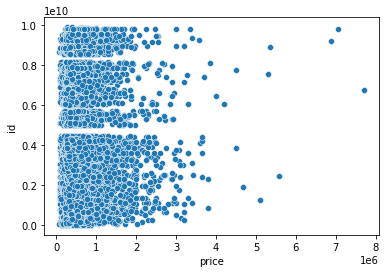

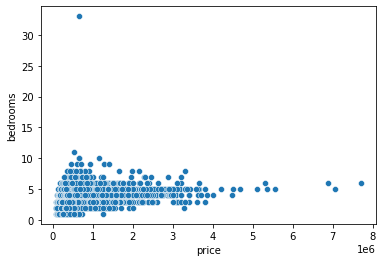

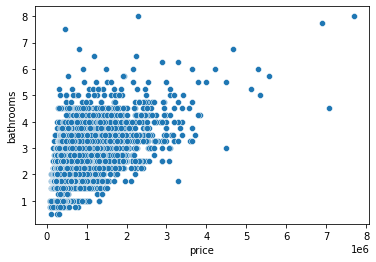

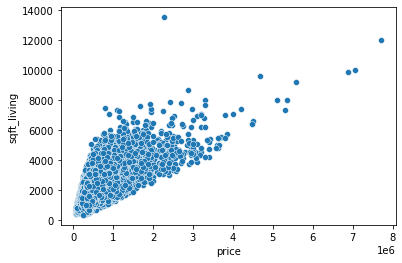

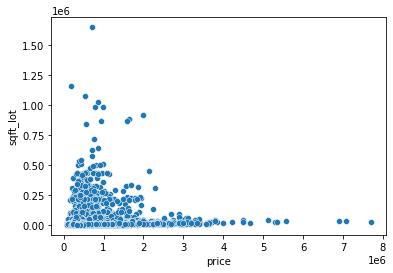

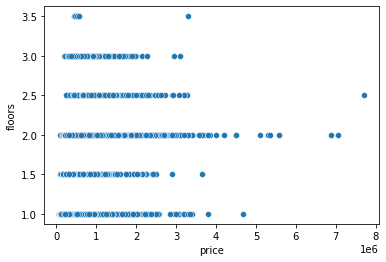

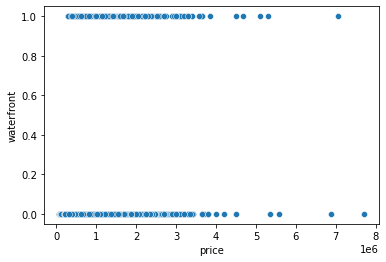

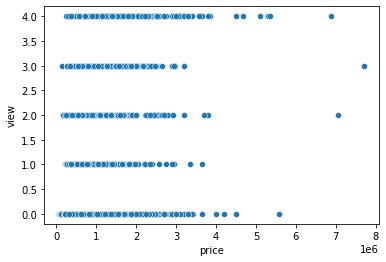

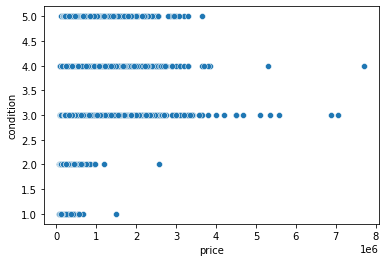

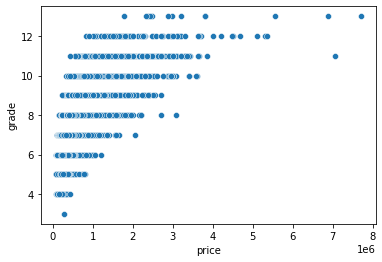

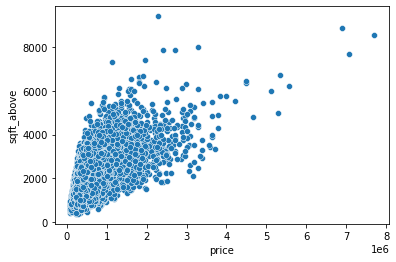

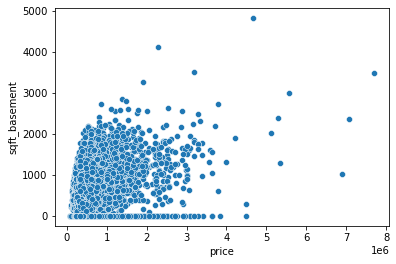

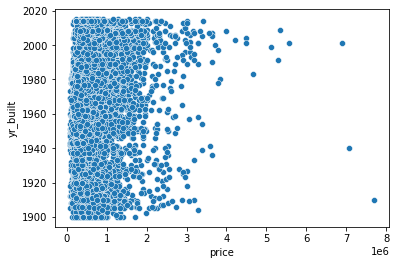

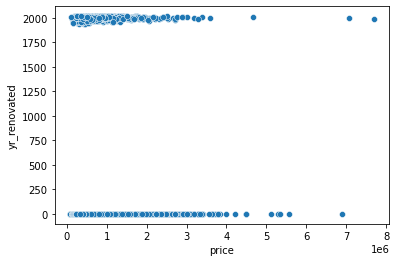

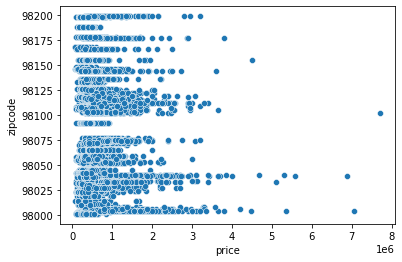

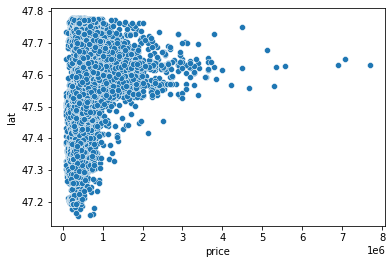

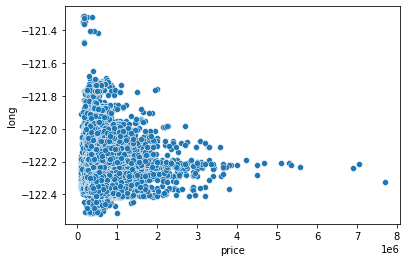

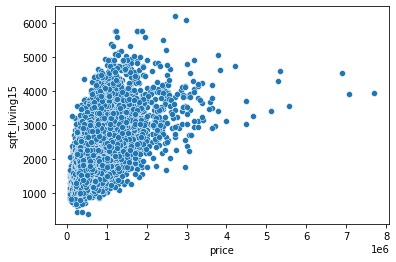

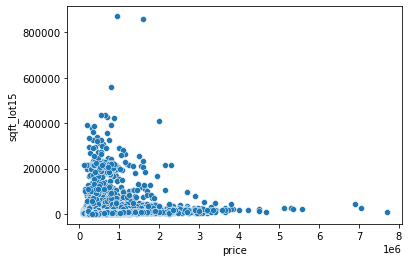

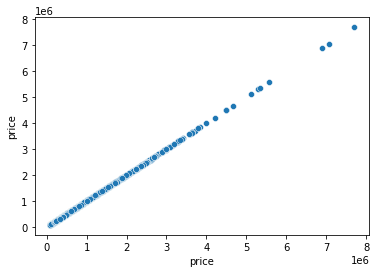

In [9]:
for column in data.select_dtypes(np.number).columns:
    sns.scatterplot(data=data, x="price", y=(data[column]))
    plt.show()

### Standardizing of Names (e.g. snakecase)

No standardization of column names is required

### Deal with ID column

The id column shows many not unique values. <br>
Some houses are listed more than once with different prices all other data seems to be unchanged <br>
There are two possibilities from my perspective: <br>
(1) either those houses have been sold twice within a short time <br>
(2) houses have been listed twice <br>
As I don't know which is right I will remove the older listing and just work with the latest one.<br>

In [10]:
# check not unique ids

data[data.duplicated(subset=['id'],keep=False)].sort_values(by=['id'])

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,4/22/15,6,3.00,2400,9373,2.0,0,0,3,...,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
2494,1000102,9/16/14,6,3.00,2400,9373,2.0,0,0,3,...,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,280000
16800,7200179,10/16/14,2,1.00,840,12750,1.0,0,0,3,...,840,0,1925,0,98055,47.4840,-122.211,1480,6969,150000
16801,7200179,4/24/15,2,1.00,840,12750,1.0,0,0,3,...,840,0,1925,0,98055,47.4840,-122.211,1480,6969,175000
11422,109200390,10/20/14,3,1.75,1480,3900,1.0,0,0,4,...,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,6/27/14,2,1.00,700,4800,1.0,0,0,3,...,700,0,1922,0,98122,47.6147,-122.300,1440,4800,260000
15186,9834200305,2/10/15,3,1.00,1790,3876,1.5,0,0,5,...,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,615000
15185,9834200305,7/16/14,3,1.00,1790,3876,1.5,0,0,5,...,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,350000
1084,9834200885,7/17/14,4,2.50,2080,4080,1.0,0,0,5,...,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080,360000


In [11]:
# drop double listings of houses

data = (data.sort_values(by=['id', 'date'], ascending=True).drop_duplicates(subset='id', keep= 'first').reset_index(drop=True))

In [12]:
# set id as index column

data = data.set_index('id')

### Deal with year columns

Both year columns cannot be used as is in my model. <br>
(1) though they are currently listed as dtype numerical they are not of numerical nature <br>
(2) as is they would blow up my database if I encode them as categorical variables

In [13]:
# use categories from Tableau exercise

conditions = [
    ((data["yr_built"] >= 1900) & (data["yr_built"] < 1930)),
    ((data["yr_built"] >= 1930) & (data["yr_built"] < 1960)),
    ((data["yr_built"] >= 1960) & (data["yr_built"] < 1990)),
    ((data["yr_built"] >= 1990) & (data["yr_built"] <= 2015))
]

values = ['A', 'B', 'C', 'D']

data["yr_built_bins"] = np.select(conditions, values)

In [14]:
# use categories from Tableau exercise

conditions = [
    ((data["yr_renovated"] >= 1900) & (data["yr_renovated"] < 1930)),
    ((data["yr_renovated"] >= 1930) & (data["yr_renovated"] < 1960)),
    ((data["yr_renovated"] >= 1960) & (data["yr_renovated"] < 1990)),
    ((data["yr_renovated"] >= 1990) & (data["yr_renovated"] <= 2015)),
    ((data["yr_renovated"] >= 0))
]

values = ['A', 'B', 'C', 'D', '0']

data["yr_renovated_bins"] = np.select(conditions, values)

In [15]:
# renovated split in yes or no
#data['renovated'] = (data['yr_renovated'] != 0)

In [16]:
data

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,yr_built_cat,yr_renovated_cat
id,,,,,,,,,,,,,,,,,,,,,
1000102,4/22/15,6,3.00,2400,9373,2.0,0,0,3,7,...,1991,0,98002,47.3262,-122.214,2060,7316,300000,D,0
1200019,5/8/14,4,1.75,2060,26036,1.0,0,0,4,8,...,1947,0,98166,47.4444,-122.351,2590,21891,647500,B,0
1200021,8/11/14,3,1.00,1460,43000,1.0,0,0,3,7,...,1952,0,98166,47.4434,-122.347,2250,20023,400000,B,0
2800031,4/1/15,3,1.00,1430,7599,1.5,0,0,4,6,...,1930,0,98168,47.4783,-122.265,1290,10320,235000,B,0
3600057,3/19/15,4,2.00,1650,3504,1.0,0,0,3,7,...,1951,2013,98144,47.5803,-122.294,1480,3504,402500,B,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,7/25/14,5,2.00,1600,4168,1.5,0,0,3,7,...,1927,0,98126,47.5297,-122.381,1190,4168,365000,A,0
9842300485,3/11/15,2,1.00,1040,7372,1.0,0,0,5,7,...,1939,0,98126,47.5285,-122.378,1930,5150,380000,B,0
9842300540,6/24/14,3,1.00,1100,4128,1.0,0,0,4,7,...,1942,0,98126,47.5296,-122.379,1510,4538,339000,B,0


### Drop Duplicates

Drop duplicate rows if present. We already know there cannot be any duplicates anymore because we removed all id duplicates.

In [17]:
data.shape

(21420, 22)

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(21420, 22)

### Drop columns

In [20]:
data = data.drop(['date', 'lat', 'long', 'yr_built', 'yr_renovated'], axis=1)

In [21]:
data.shape

(21420, 17)

### Change dtypes

In [22]:
# change dtypes for categorical numerical columns

# waterfront is a boolean column (1=waterfront, 0=no waterfront)
# view is a categorical column with some kind of scoring
# condition is a categorical column with some kind of scoring
# grade is a categorical column with some kind of scoring
# zipcode is a categorical column which represents a location

data = data.astype({'waterfront':'boolean', 'view':'object','condition':'object', 'zipcode':'object','bedrooms':'object','bathrooms':'object','floors':'object'})

In [23]:
data.dtypes

bedrooms             object
bathrooms            object
sqft_living           int64
sqft_lot              int64
floors               object
waterfront          boolean
view                 object
condition            object
grade                 int64
sqft_above            int64
sqft_basement         int64
zipcode              object
sqft_living15         int64
sqft_lot15            int64
price                 int64
yr_built_cat         object
yr_renovated_cat     object
dtype: object

### Null and zero values

In [24]:
# no null values present in the dataset

data.isna().any()

bedrooms            False
bathrooms           False
sqft_living         False
sqft_lot            False
floors              False
waterfront          False
view                False
condition           False
grade               False
sqft_above          False
sqft_basement       False
zipcode             False
sqft_living15       False
sqft_lot15          False
price               False
yr_built_cat        False
yr_renovated_cat    False
dtype: bool

In [25]:
# no null values present in the dataset

data.isnull().sum()

bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
zipcode             0
sqft_living15       0
sqft_lot15          0
price               0
yr_built_cat        0
yr_renovated_cat    0
dtype: int64

In [29]:
data.describe()

,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
count,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04
mean,2083.132633,1.512804e+04,7.662792,1791.170215,291.962418,1988.384080,12775.718161,5.415246e+05
std,918.808412,4.153080e+04,1.171971,828.692965,442.875502,685.537057,27345.621867,3.676780e+05
min,370.000000,5.200000e+02,3.000000,370.000000,0.000000,399.000000,651.000000,7.800000e+04
25%,1430.000000,5.040000e+03,7.000000,1200.000000,0.000000,1490.000000,5100.000000,3.242700e+05
50%,1920.000000,7.614000e+03,7.000000,1560.000000,0.000000,1840.000000,7620.000000,4.500000e+05
75%,2550.000000,1.069050e+04,8.000000,2220.000000,560.000000,2370.000000,10086.250000,6.450000e+05
max,13540.000000,1.651359e+06,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,7.700000e+06


In [30]:
# correlation matrix

data.corr()

,sqft_living,sqft_lot,waterfront,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
sqft_living,1.000000,0.172586,0.103938,0.762477,0.876533,0.434505,0.756186,0.183837,0.701462
sqft_lot,0.172586,1.000000,0.021599,0.113656,0.183210,0.015239,0.143805,0.717743,0.088806
waterfront,0.103938,0.021599,1.000000,0.082955,0.072055,0.080808,0.086602,0.030772,0.266987
grade,0.762477,0.113656,0.082955,1.000000,0.756221,0.166854,0.713178,0.120056,0.667154
sqft_above,0.876533,0.183210,0.072055,0.756221,1.000000,-0.052672,0.731887,0.194445,0.604646
sqft_basement,0.434505,0.015239,0.080808,0.166854,-0.052672,1.000000,0.199334,0.017558,0.323891
sqft_living15,0.756186,0.143805,0.086602,0.713178,0.731887,0.199334,1.000000,0.182765,0.583947
sqft_lot15,0.183837,0.717743,0.030772,0.120056,0.194445,0.017558,0.182765,1.000000,0.082090
price,0.701462,0.088806,0.266987,0.667154,0.604646,0.323891,0.583947,0.082090,1.000000


### Review cleaned dataset

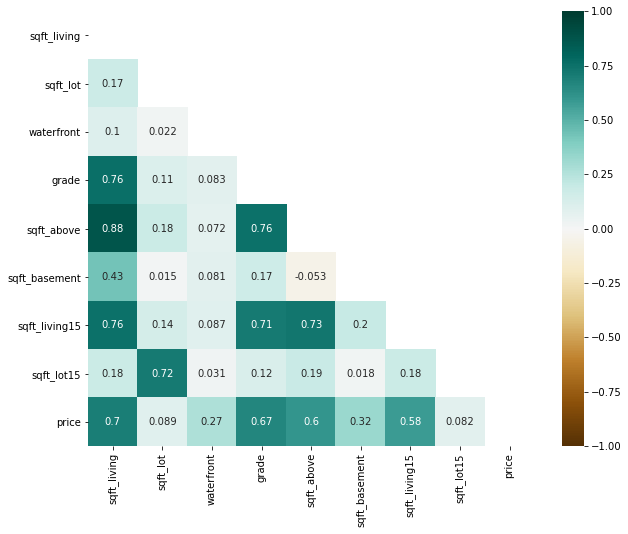

In [26]:
# create correlation heatmap 

mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.show()

In [27]:
data.shape

(21420, 17)

In [28]:
# cleaned dataframe
data_c = data

### Split Data into numerical and categorical dataframes

In [29]:
# split in numerical and categorical variables

num_df = data_c.select_dtypes(include = np.number)
cat_df = data_c.select_dtypes(include = object)

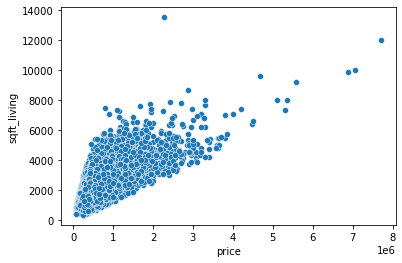

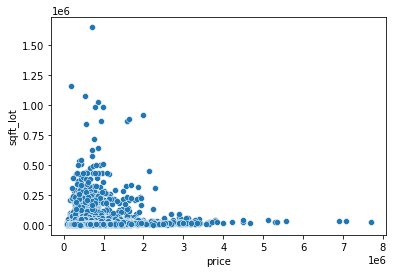

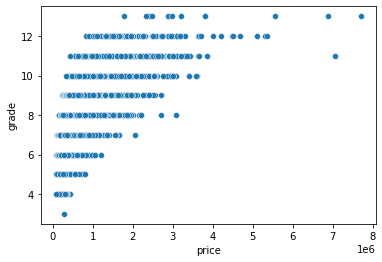

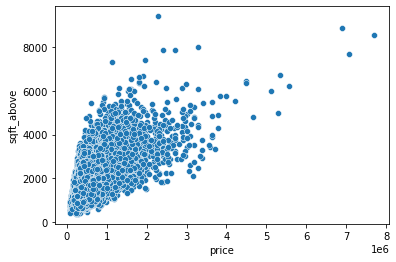

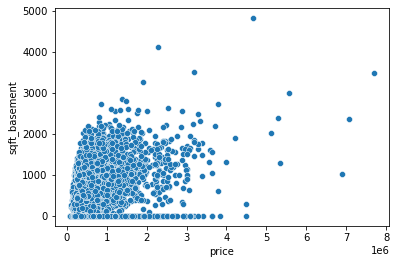

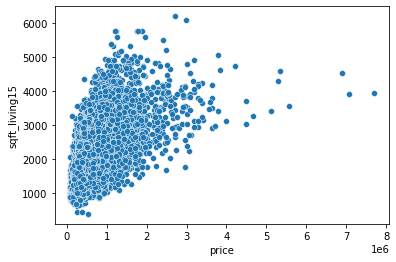

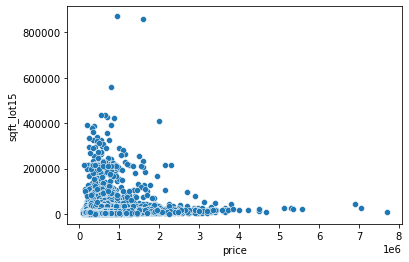

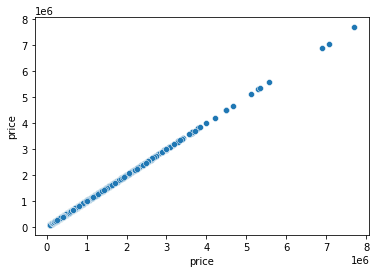

In [30]:
for column in num_df.columns:
    sns.scatterplot(data=num_df, x="price", y=(num_df[column]))
    plt.show()

Using a second identical Jupyter Notebook I 'played around' with the dtype of the different variables. <br>
Some of them could be considered both numerical and categorical.<br>
To be sure I tried with different versions and came to the conclusion to use most of them as categorical variables.<br>

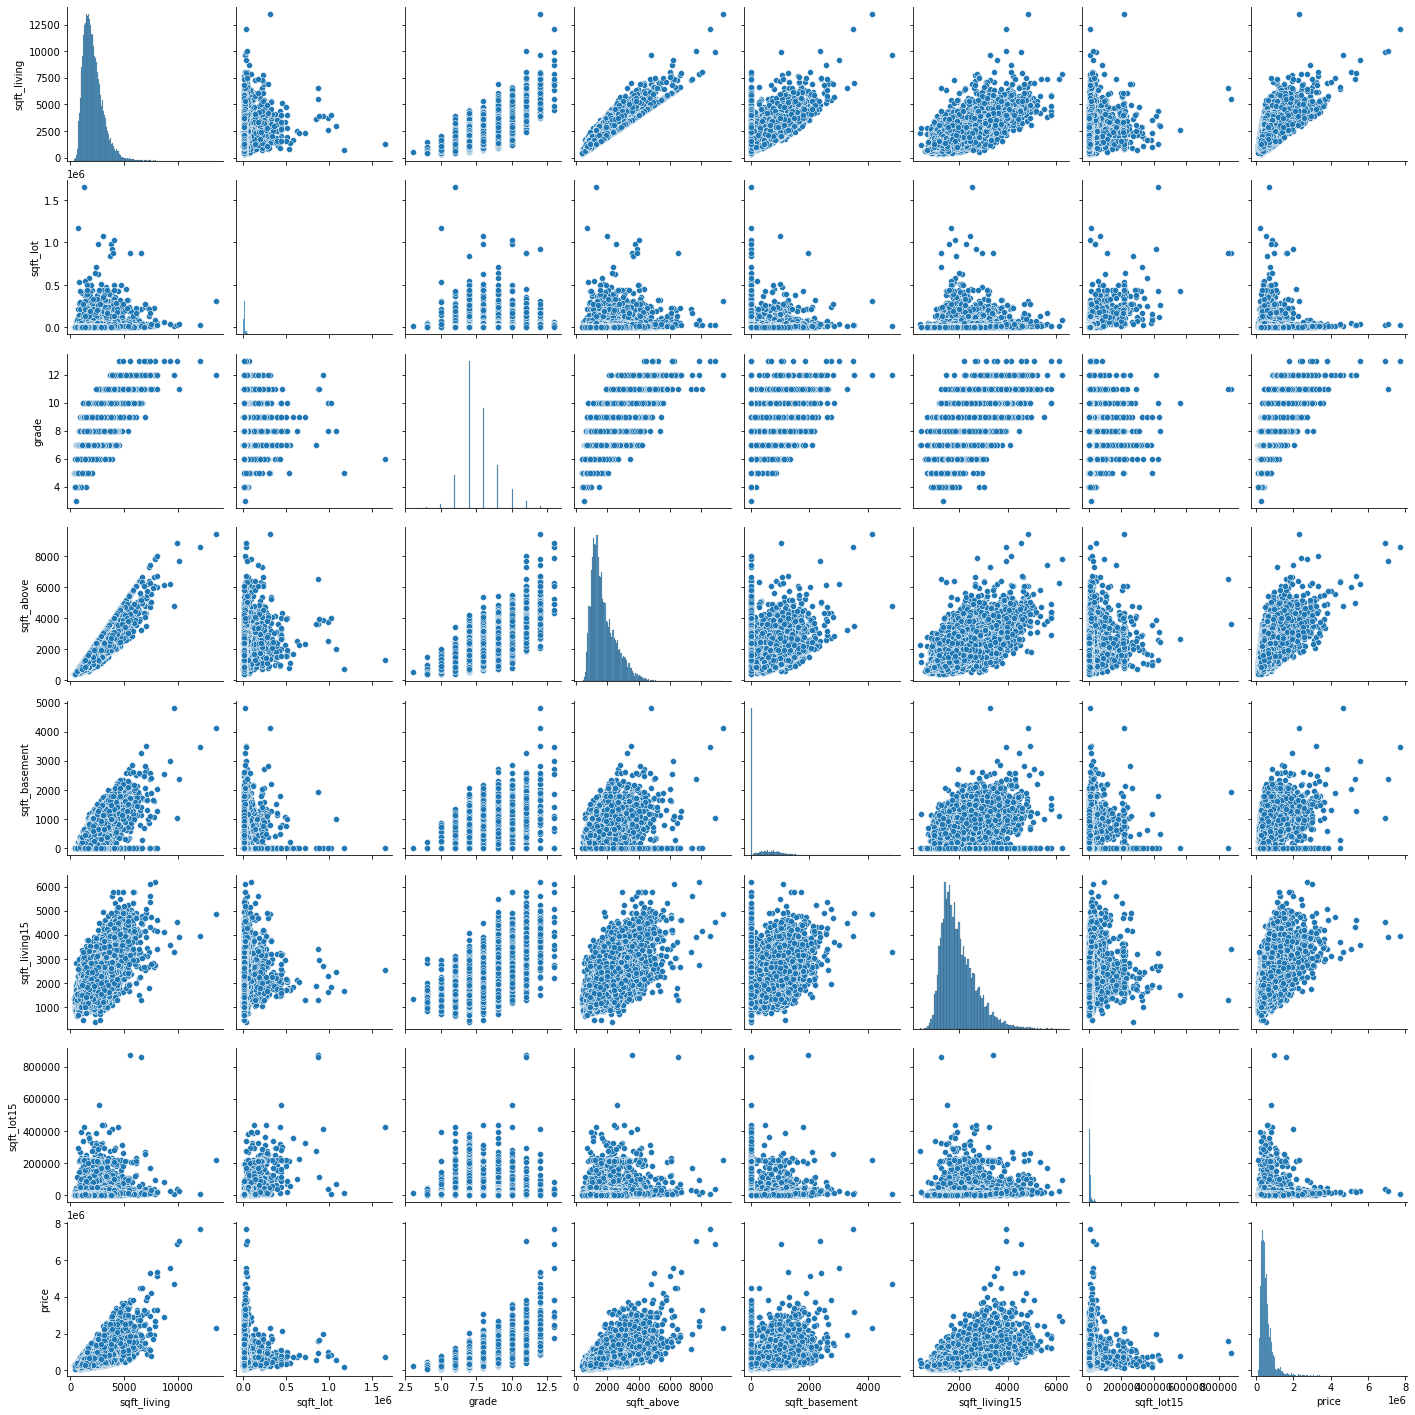

In [31]:
sns.pairplot(num_df)

## Outliers

### Visually Check for Outliers

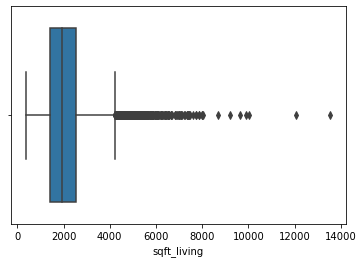

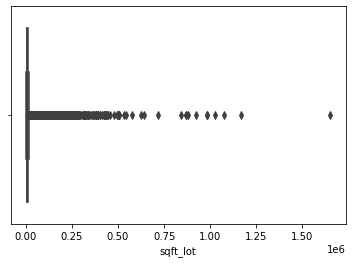

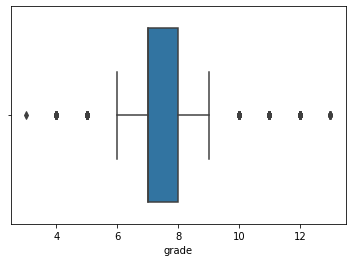

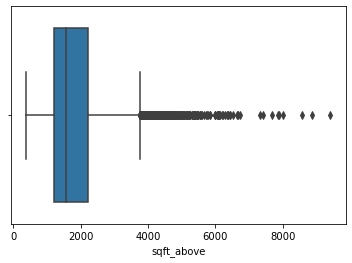

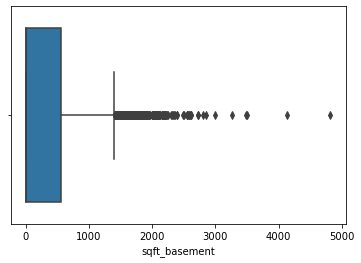

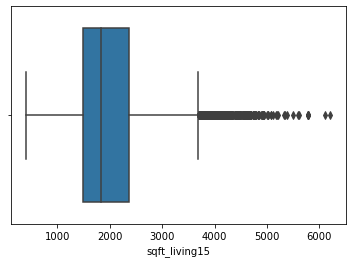

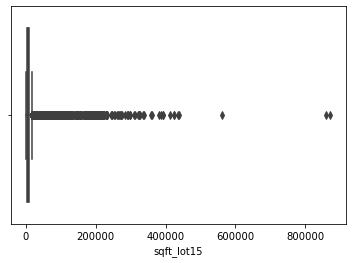

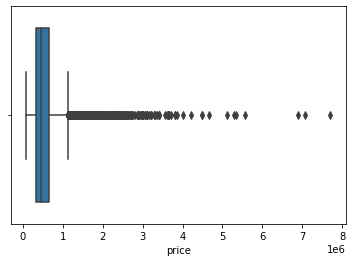

In [32]:
for column in num_df.columns:
    sns.boxplot(num_df[column])
    plt.show()

### First try - threshold 1.25 on all variables that contain Outliers

In [33]:
def remove_outliers(data, threshold=1.25, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [34]:
num_df1 = remove_outliers(num_df, threshold=1.25, in_columns=['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement','price','sqft_living15', 'sqft_lot15','grade'])

In [35]:
num_df1.shape

(15103, 8)

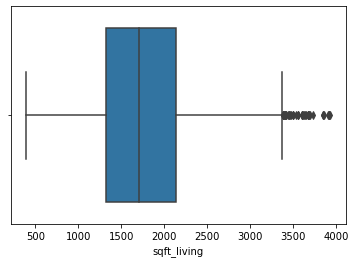

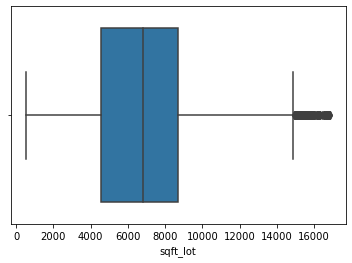

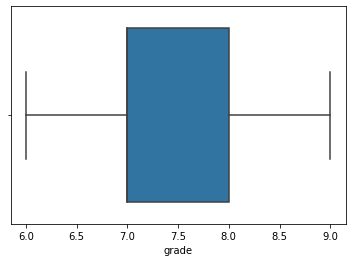

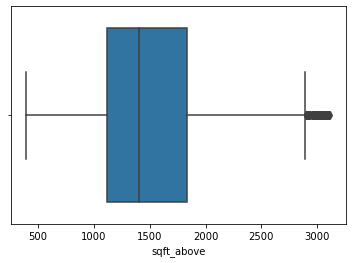

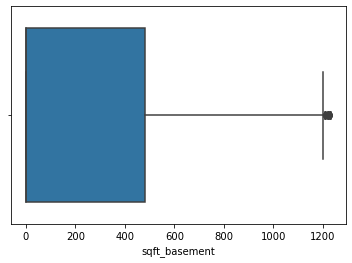

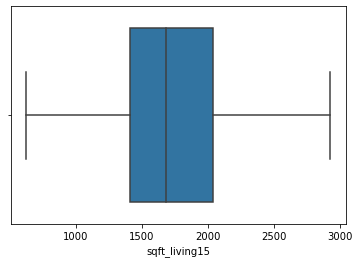

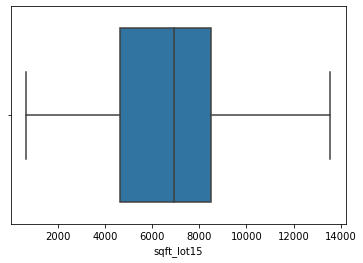

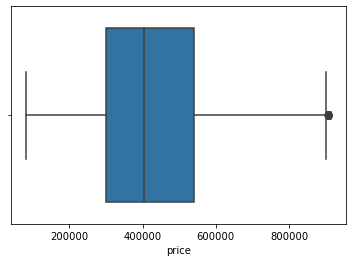

In [36]:
for column in num_df1.columns:
    sns.boxplot(num_df1[column])
    plt.show()

threshold of 1.25 seems to work well for sqft_living15, sqft_lot15 and grade <br>
let's increase it for the other values

### Second try with 0.75 thresholds on all variables

In [37]:
def remove_outliers2(data, threshold=0.75, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [38]:
num_df2 = remove_outliers2(num_df, threshold=0.75, in_columns=['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement','price','sqft_living15', 'sqft_lot15','grade'])

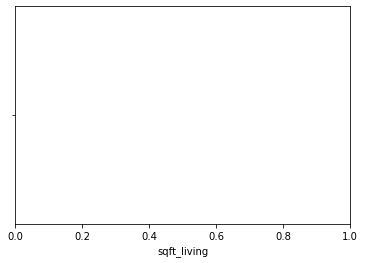

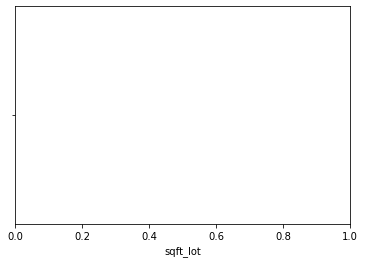

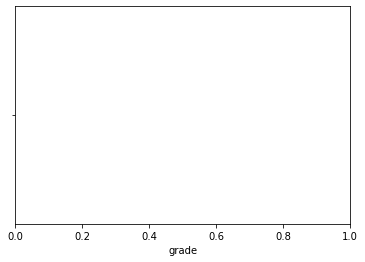

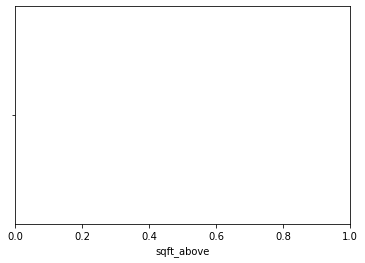

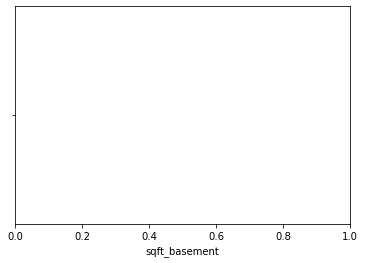

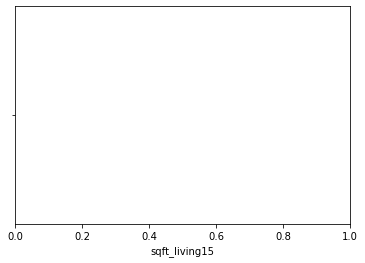

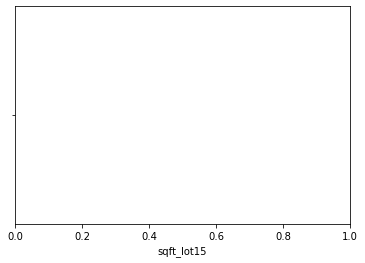

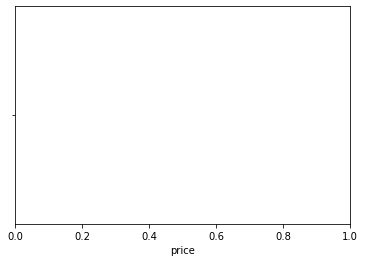

In [39]:
for column in num_df2.columns:
    sns.boxplot(num_df2[column])
    plt.show()

threshold of 0.75 seems to work well for price, sqft_basement, sqft_above and sqft_lot <br>
let's increase it for the other values

### Thrid try with different thresholds on all variables

In [40]:
def remove_outliers3(data, threshold=0.1, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [41]:
num_df3 = (remove_outliers3(num_df, threshold=0.1, in_columns=['sqft_living']))
num_df4 = (remove_outliers2(num_df3, threshold=0.75, in_columns=['sqft_lot', 'sqft_above','sqft_basement']))
num_df5 = (remove_outliers(num_df4, threshold=1.25, in_columns=['sqft_living15', 'sqft_lot15','grade','price']))

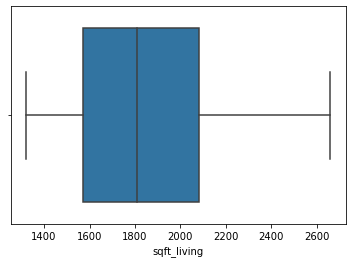

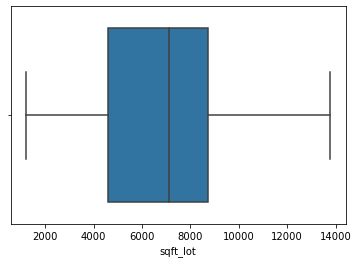

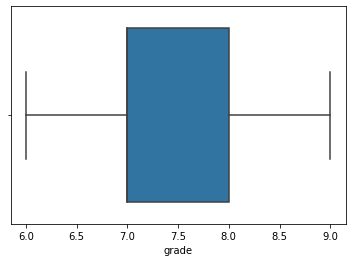

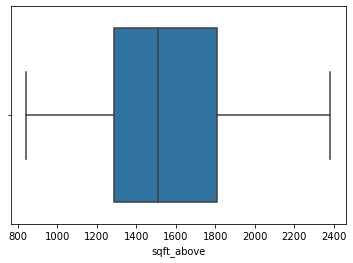

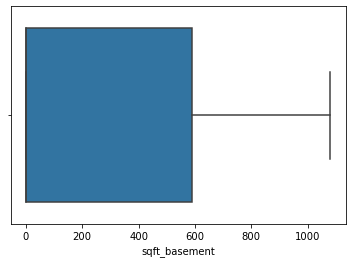

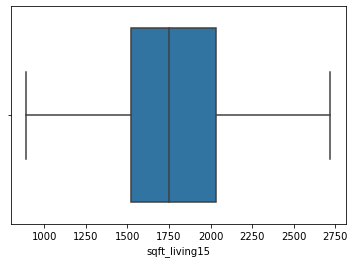

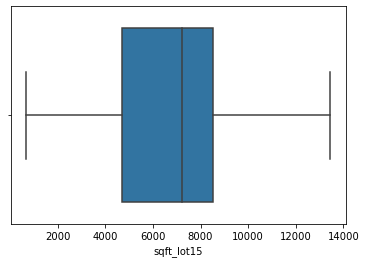

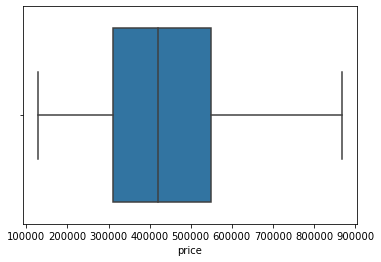

In [42]:
for column in num_df5.columns:
    sns.boxplot(num_df5[column])
    plt.show()

In [43]:
# rename an backup
num_df_o = num_df5

In [44]:
num_df_o.shape

# only 8839 rows from 21420 rows are left (41.27%) almost 60% lost

(8839, 8)

### Fourth try Windsorize Outliers

used method found on : https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

In [45]:
# create function to determine outer fences

def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

In [46]:
#check outer_fence_le and outer_fence_ue for all numerical variables

for i in num_df:
    print(i, fences(num_df,i))

sqft_living (-1930.0, 5910.0)
sqft_lot (-11911.5, 27642.0)
grade (4.0, 11.0)
sqft_above (-1860.0, 5280.0)
sqft_basement (-1680.0, 2240.0)
sqft_living15 (-1150.0, 5010.0)
sqft_lot15 (-9858.75, 25045.0)
price (-637920.0, 1607190.0)


The lower end is below zero for all variables. Because none of these variables can actually be below zero the data should only be winsorized on its right tail. Now, we can look at values at different percentiles to set k.

In [47]:
#Explore different quantiles at the upper end

#write function that checks the closest percentile

for i in num_df:
    print( i, fences(num_df,i))
    print('90% quantile:   ', num_df[i].quantile(0.90))       
    print('92.5% quantile: ', num_df[i].quantile(0.925))      
    print('95% quantile:   ', num_df[i].quantile(0.95))      
    print('97.5% quantile: ', num_df[i].quantile(0.975))     
    print('99% quantile:   ', num_df[i].quantile(0.99))      
    print('99.9% quantile: ', num_df[i].quantile(0.999)) 
    print()

sqft_living (-1930.0, 5910.0)
90% quantile:    3260.0
92.5% quantile:  3470.0
95% quantile:    3770.0
97.5% quantile:  4270.0
99% quantile:    4980.0
99.9% quantile:  7299.0500000000975

sqft_lot (-11911.5, 27642.0)
90% quantile:    21466.200000000026
92.5% quantile:  32245.325000000008
95% quantile:    43560.0
97.5% quantile:  85516.64999999943
99% quantile:    213008.0
99.9% quantile:  497041.4970000118

grade (4.0, 11.0)
90% quantile:    9.0
92.5% quantile:  10.0
95% quantile:    10.0
97.5% quantile:  10.0
99% quantile:    11.0
99.9% quantile:  12.0

sqft_above (-1860.0, 5280.0)
90% quantile:    2950.0
92.5% quantile:  3150.0
95% quantile:    3400.0
97.5% quantile:  3830.524999999998
99% quantile:    4370.0
99.9% quantile:  6115.8100000000195

sqft_basement (-1680.0, 2240.0)
90% quantile:    970.0
92.5% quantile:  1050.0
95% quantile:    1190.0
97.5% quantile:  1390.0
99% quantile:    1660.0
99.9% quantile:  2377.4300000000585

sqft_living15 (-1150.0, 5010.0)
90% quantile:    2930.0

Now we are looking for the values closest to the outer_fence_ue (the higher end) <br>
Following percentages are closest for each variable:<br>
sqft_living: 99% - k=1<br>
sqft_lot: 99% - k=1<br>
grade: 99% - k=1<br>
sqft_above: 99% - k=1<br>
sqft_basement: 99% - k=1<br>
sqft_living15: 99% - k=1<br>
sqft_lot15: 92.5% - k=7.5<br>
price: 97.5% - k=2.5<br>
I will winsorize the data on all respective k values using the winsorize function from scipy:

In [48]:
#Create copy of df
num_df_win = num_df.copy(deep=True)

#Winsorize on right-tail
num_df_win['sqft_living_99%'] = winsorize(num_df['sqft_living'], limits=(0, 0.01))
num_df_win['sqft_lot_99%'] = winsorize(num_df['sqft_lot'], limits=(0, 0.01))
num_df_win['grade_99%'] = winsorize(num_df['grade'], limits=(0, 0.01))
num_df_win['sqft_above_99%'] = winsorize(num_df['sqft_above'], limits=(0, 0.01))
num_df_win['sqft_basement_99%'] = winsorize(num_df['sqft_basement'], limits=(0, 0.01))
num_df_win['sqft_living15_99%'] = winsorize(num_df['sqft_living15'], limits=(0, 0.01))
num_df_win['sqft_lot15_92.5%'] = winsorize(num_df['sqft_lot15'], limits=(0, 0.075))
num_df_win['price_wins_97.5%'] = winsorize(num_df['price'], limits=(0, 0.025))

In [49]:
num_df_win.describe()

,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,sqft_living_99%,sqft_lot_99%,grade_99%,sqft_above_99%,sqft_basement_99%,sqft_living15_99%,sqft_lot15_92.5%,price_wins_97.5%
count,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04
mean,2083.132633,1.512804e+04,7.662792,1791.170215,291.962418,1988.384080,12775.718161,5.415246e+05,2073.259104,13995.162418,7.657470,1783.660224,288.625584,1983.791737,8930.098366,5.261833e+05
std,918.808412,4.153080e+04,1.171971,828.692965,442.875502,685.537057,27345.621867,3.676780e+05,874.185456,27719.441526,1.153875,796.874749,429.318893,668.509251,5905.326323,2.879144e+05
min,370.000000,5.200000e+02,3.000000,370.000000,0.000000,399.000000,651.000000,7.800000e+04,370.000000,520.000000,3.000000,370.000000,0.000000,399.000000,651.000000,7.800000e+04
25%,1430.000000,5.040000e+03,7.000000,1200.000000,0.000000,1490.000000,5100.000000,3.242700e+05,1430.000000,5040.000000,7.000000,1200.000000,0.000000,1490.000000,5100.000000,3.242700e+05
50%,1920.000000,7.614000e+03,7.000000,1560.000000,0.000000,1840.000000,7620.000000,4.500000e+05,1920.000000,7614.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,4.500000e+05
75%,2550.000000,1.069050e+04,8.000000,2220.000000,560.000000,2370.000000,10086.250000,6.450000e+05,2550.000000,10690.500000,8.000000,2220.000000,560.000000,2370.000000,10086.250000,6.450000e+05
max,13540.000000,1.651359e+06,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,7.700000e+06,4980.000000,213008.000000,11.000000,4370.000000,1660.000000,4080.000000,24967.000000,1.490000e+06


In [50]:
# create new numerical dataframe to use for our model

num_df_w = num_df_win.drop(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'price', 'grade', 'sqft_living15', 'sqft_lot15'], axis=1)
num_df_w.shape

(21420, 8)

## variance inflation factor

A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model. <br>
Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. <br>
A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables. <br>

https://www.investopedia.com/terms/v/variance-inflation-factor.asp

## Create and Evaluate different Models

I won't try label encoding for any of my models since I changed most numercial variables into categoricals because of this reason. One major issue with this approach is there is no relation or order between these classes.

### Outliers not removed, no normalization, OneHotEncoding (21420 rows × 135 columns)

In [51]:
# encode categorical variables
cat_df = pd.get_dummies(cat_df, drop_first=True)

In [52]:
# check shape of numerical & categorical variables
num_df.shape , cat_df.shape

((21420, 8), (21420, 127))

In [83]:
# merge categorical and numerical variables to model dataframe
# review model dataframe
model_df = pd.merge(cat_df, num_df, left_index=True, right_index=True)
model_df

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,...,yr_renovated_cat_C,yr_renovated_cat_D,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,,
1000102,0,0,0,0,1,0,0,0,0,0,...,0,0,2400,9373,7,2400,0,2060,7316,300000
1200019,0,0,1,0,0,0,0,0,0,0,...,0,0,2060,26036,8,1160,900,2590,21891,647500
1200021,0,1,0,0,0,0,0,0,0,0,...,0,0,1460,43000,7,1460,0,2250,20023,400000
2800031,0,1,0,0,0,0,0,0,0,0,...,0,0,1430,7599,6,1010,420,1290,10320,235000
3600057,0,0,1,0,0,0,0,0,0,0,...,0,1,1650,3504,7,760,890,1480,3504,402500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,0,0,0,1,0,0,0,0,0,0,...,0,0,1600,4168,7,1600,0,1190,4168,365000
9842300485,1,0,0,0,0,0,0,0,0,0,...,0,0,1040,7372,7,840,200,1930,5150,380000
9842300540,0,1,0,0,0,0,0,0,0,0,...,0,0,1100,4128,7,720,380,1510,4538,339000


In [84]:
## x\y split
X = model_df.drop('price', axis=1)
y = model_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
predictions  = model.predict(X_test)
predictions.shape

(6426,)

In [87]:
# evaluate model
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.7990064417549356, 164455.9132513475, 27045747403.334732)

### Outliers removed (boxplot), no normalization, OneHotEncoding (8839 rows × 135 columns)

In [95]:
# encode categorical variables
cat_df = pd.get_dummies(cat_df, drop_first=True)

In [96]:
# check shape of numerical & categorical variables
num_df_o.shape , cat_df.shape

((8839, 8), (21420, 127))

Amount of rows of both dataframes is not equal

In [97]:
# merge categorical and numerical variables to model dataframe
# review model dataframe
model_df_o = pd.merge(num_df_o, cat_df, left_index=True, right_index=True)
model_df_o

,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,bedrooms_2,bedrooms_3,...,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,yr_built_cat_B,yr_built_cat_C,yr_built_cat_D,yr_renovated_cat_B,yr_renovated_cat_C,yr_renovated_cat_D
id,,,,,,,,,,,,,,,,,,,,,
2800031,1430,7599,6,1010,420,1290,10320,235000,0,1,...,0,0,0,0,1,0,0,0,0,0
3600072,2220,5310,7,1170,1050,1540,4200,680000,0,0,...,0,0,0,0,1,0,0,0,0,0
7200080,1980,10585,6,1980,0,1360,7810,239000,0,0,...,0,0,0,0,0,0,0,0,0,0
7600057,1410,2700,7,1410,0,1750,4000,520000,0,1,...,0,0,0,0,0,0,0,0,0,0
7600065,1530,1245,9,1050,480,1530,2307,465000,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839300875,1700,4400,8,1700,0,1610,4180,800000,0,1,...,0,0,0,0,0,0,0,0,0,0
9839301055,1490,4400,7,1490,0,1560,4400,670000,0,1,...,0,0,0,0,0,0,0,0,0,0
9839301060,1740,4400,8,1740,0,1740,4400,650500,0,1,...,0,0,0,0,0,0,0,0,0,0


In [98]:
## x\y split
Xo = model_df_o.drop('price', axis=1)
yo = model_df_o['price']
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.3, random_state=1)

In [99]:
model = LinearRegression()
model.fit(Xo_train, yo_train)

LinearRegression()

In [100]:
predictions  = model.predict(Xo_test)
predictions.shape

(2652,)

In [101]:
# evaluate model
r2_score(yo_test, predictions), mean_squared_error(yo_test, predictions, squared=False), mean_squared_error(yo_test, predictions)

(0.8173441745822727, 66615.32207367955, 4437601134.980057)

### Outliers removed (windsorize), no normalization, OneHotEncoding (21420 rows × 135 columns)


In [53]:
# encode categorical variables
cat_df = pd.get_dummies(cat_df, drop_first=True)

In [54]:
# check shape of numerical & categorical variables
num_df_w.shape , cat_df.shape

((21420, 8), (21420, 127))

In [55]:
# merge categorical and numerical variables to model dataframe
# review model dataframe
model_df_w = pd.merge(cat_df, num_df_w, left_index=True, right_index=True)
model_df_w

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,...,yr_renovated_cat_C,yr_renovated_cat_D,sqft_living_99%,sqft_lot_99%,grade_99%,sqft_above_99%,sqft_basement_99%,sqft_living15_99%,sqft_lot15_92.5%,price_wins_97.5%
id,,,,,,,,,,,,,,,,,,,,,
1000102,0,0,0,0,1,0,0,0,0,0,...,0,0,2400,9373,7,2400,0,2060,7316,300000
1200019,0,0,1,0,0,0,0,0,0,0,...,0,0,2060,26036,8,1160,900,2590,21891,647500
1200021,0,1,0,0,0,0,0,0,0,0,...,0,0,1460,43000,7,1460,0,2250,20023,400000
2800031,0,1,0,0,0,0,0,0,0,0,...,0,0,1430,7599,6,1010,420,1290,10320,235000
3600057,0,0,1,0,0,0,0,0,0,0,...,0,1,1650,3504,7,760,890,1480,3504,402500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,0,0,0,1,0,0,0,0,0,0,...,0,0,1600,4168,7,1600,0,1190,4168,365000
9842300485,1,0,0,0,0,0,0,0,0,0,...,0,0,1040,7372,7,840,200,1930,5150,380000
9842300540,0,1,0,0,0,0,0,0,0,0,...,0,0,1100,4128,7,720,380,1510,4538,339000


In [57]:
## x\y split
Xw = model_df_w.drop('price_wins_97.5%', axis=1)
yw = model_df_w['price_wins_97.5%']
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.3, random_state=1)

In [58]:
model = LinearRegression()
model.fit(Xw_train, yw_train)

LinearRegression()

In [59]:
predictions  = model.predict(Xw_test)
predictions.shape

(6426,)

In [60]:
# evaluate model
r2_score(yw_test, predictions), mean_squared_error(yw_test, predictions, squared=False), mean_squared_error(yw_test, predictions)

(0.8666816350961327, 105800.5435567368, 11193755016.90096)

as the OneHotEncoding together with windsorize to remove Outliers resulted in the highest r2 score I will continue with this model and try some additions transformations

### Outliers removed (windsorize), boxcox transformation, OneHotEncoding

In [74]:
num_df_w_b = num_df_w

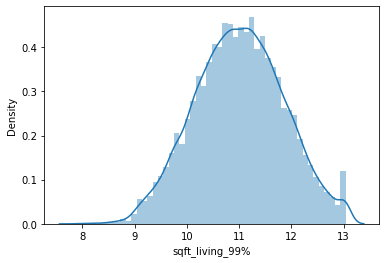

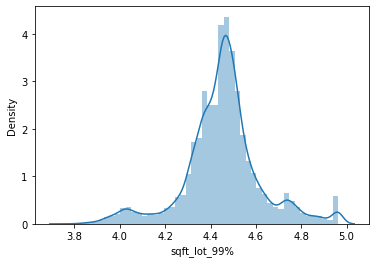

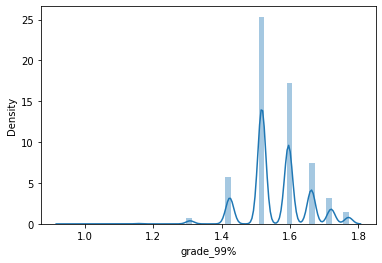

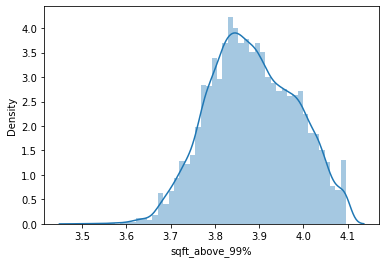

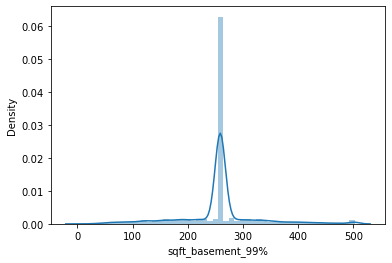

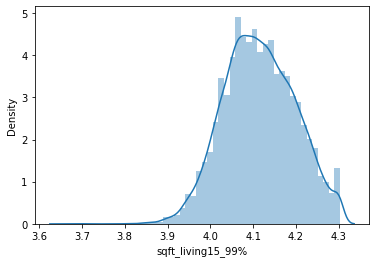

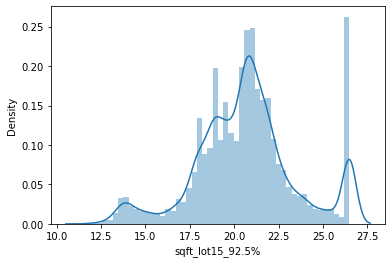

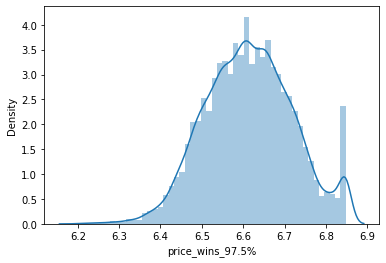

In [75]:
# check distribution of variables

for column in num_df_w_b.columns:
    sns.distplot(num_df_w_b[column])
    plt.show()

In [64]:
# boxcox transformation

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [76]:
df, _ci = boxcox_transform(num_df_w_b)
num_df_w_b

,sqft_living_99%,sqft_lot_99%,grade_99%,sqft_above_99%,sqft_basement_99%,sqft_living15_99%,sqft_lot15_92.5%,price_wins_97.5%
id,,,,,,,,
1000102,10.144854,6.141937,0.531943,2.336536,258.358783,2.736096,19.932894,4.969358
1200019,9.843884,6.577338,0.614281,2.223748,305.182326,2.781051,25.429240,5.107876
1200021,9.180664,6.766700,0.531943,2.261356,258.358783,2.753651,24.942865,5.022683
2800031,9.141323,6.043623,0.433847,2.200188,163.411115,2.637852,21.549656,4.922599
3600057,9.413984,5.652539,0.531943,2.149517,302.408086,2.667608,16.773955,5.023817
...,...,...,...,...,...,...,...,...
9842300095,9.355054,5.744204,0.531943,2.275815,258.358783,2.620010,17.483521,5.005913
9842300485,8.547046,6.029148,0.531943,2.167709,88.495424,2.722934,18.377277,5.013312
9842300540,8.650481,5.739172,0.531943,2.139522,150.492037,2.671889,17.838979,4.992241


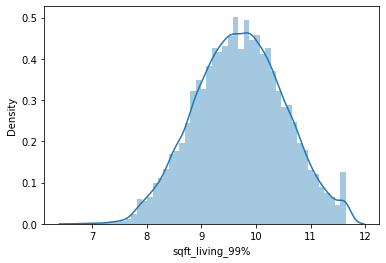

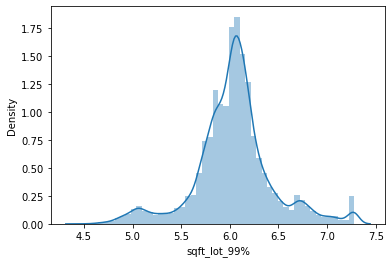

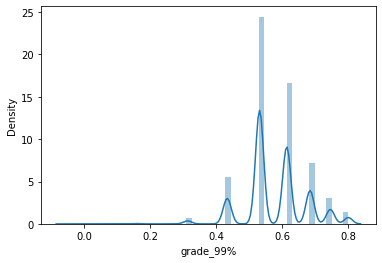

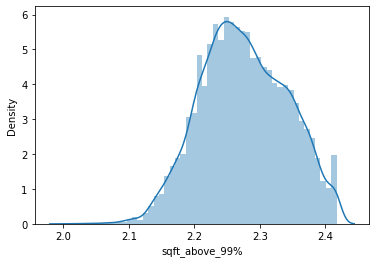

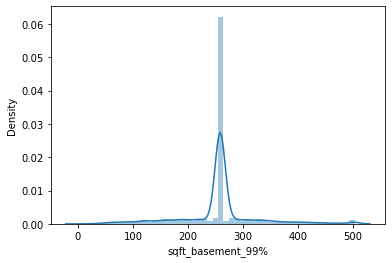

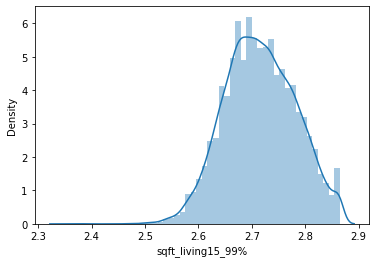

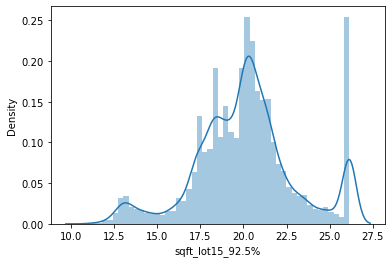

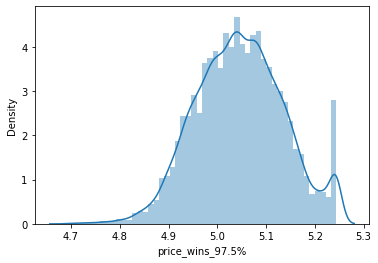

In [77]:
# check distribution of variables

for column in num_df_w_b.columns:
    sns.distplot(num_df_w_b[column])
    plt.show()

In [78]:
# merge categorical and numerical variables to model dataframe
# review model dataframe
model_df_w_b = pd.merge(cat_df, num_df_w_b, left_index=True, right_index=True)
model_df_w_b

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,...,yr_renovated_cat_C,yr_renovated_cat_D,sqft_living_99%,sqft_lot_99%,grade_99%,sqft_above_99%,sqft_basement_99%,sqft_living15_99%,sqft_lot15_92.5%,price_wins_97.5%
id,,,,,,,,,,,,,,,,,,,,,
1000102,0,0,0,0,1,0,0,0,0,0,...,0,0,10.144854,6.141937,0.531943,2.336536,258.358783,2.736096,19.932894,4.969358
1200019,0,0,1,0,0,0,0,0,0,0,...,0,0,9.843884,6.577338,0.614281,2.223748,305.182326,2.781051,25.429240,5.107876
1200021,0,1,0,0,0,0,0,0,0,0,...,0,0,9.180664,6.766700,0.531943,2.261356,258.358783,2.753651,24.942865,5.022683
2800031,0,1,0,0,0,0,0,0,0,0,...,0,0,9.141323,6.043623,0.433847,2.200188,163.411115,2.637852,21.549656,4.922599
3600057,0,0,1,0,0,0,0,0,0,0,...,0,1,9.413984,5.652539,0.531943,2.149517,302.408086,2.667608,16.773955,5.023817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842300095,0,0,0,1,0,0,0,0,0,0,...,0,0,9.355054,5.744204,0.531943,2.275815,258.358783,2.620010,17.483521,5.005913
9842300485,1,0,0,0,0,0,0,0,0,0,...,0,0,8.547046,6.029148,0.531943,2.167709,88.495424,2.722934,18.377277,5.013312
9842300540,0,1,0,0,0,0,0,0,0,0,...,0,0,8.650481,5.739172,0.531943,2.139522,150.492037,2.671889,17.838979,4.992241


In [70]:
## x\y split
Xwb = model_df_w_b.drop('price_wins_97.5%', axis=1)
ywb = model_df_w_b['price_wins_97.5%']
Xwb_train, Xwb_test, ywb_train, ywb_test = train_test_split(Xwb, ywb, test_size=0.3, random_state=1)

In [71]:
model = LinearRegression()
model.fit(Xwb_train, ywb_train)

LinearRegression()

In [72]:
predictions  = model.predict(Xwb_test)
predictions.shape

(6426,)

In [73]:
# evaluate model
r2_score(ywb_test, predictions), mean_squared_error(ywb_test, predictions, squared=False), mean_squared_error(ywb_test, predictions)

(0.877787421965712, 0.037118918278710784, 0.0013778140941816098)

### Outliers removed (windsorize), log transformation, OneHotEncoding

In [79]:
num_df_w_l = num_df_w

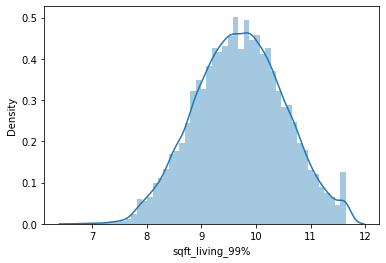

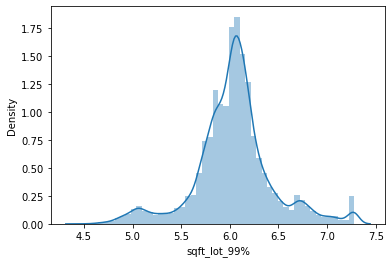

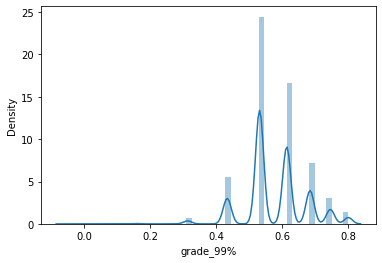

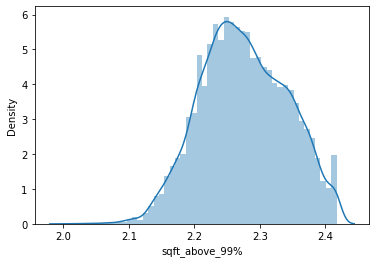

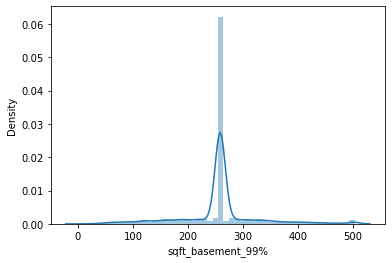

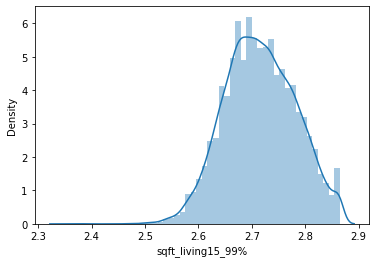

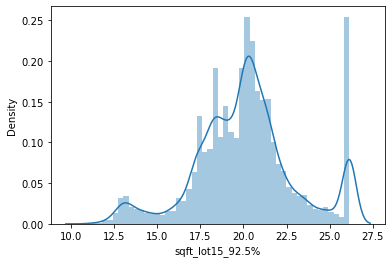

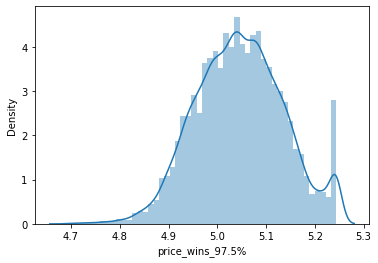

In [80]:
# check distribution of variables

for column in num_df_w_l.columns:
    sns.distplot(num_df_w_l[column])
    plt.show()

In [87]:
# log transformation

def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [88]:
num_df_w_l = num_df_w_l.apply(log_transform)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

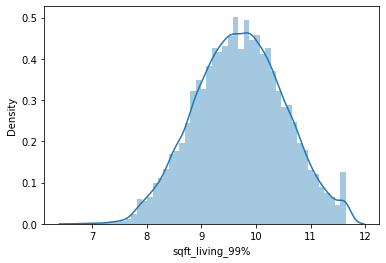

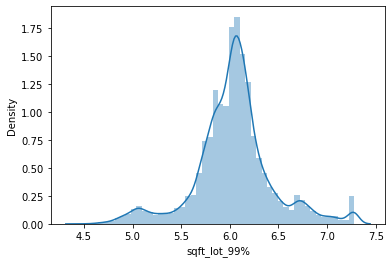

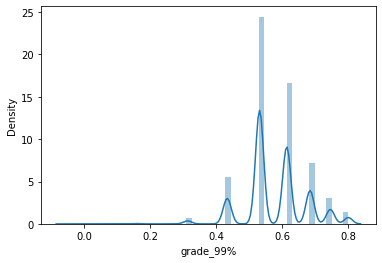

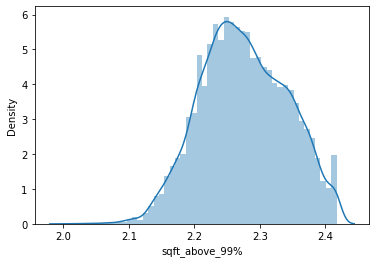

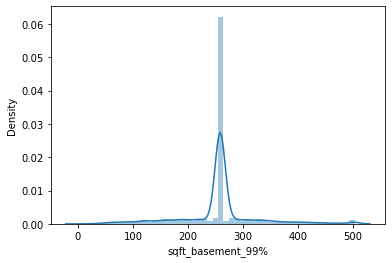

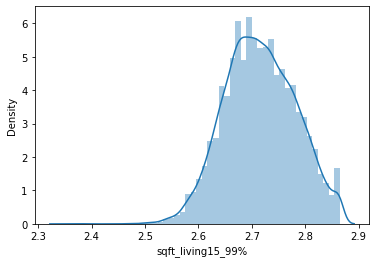

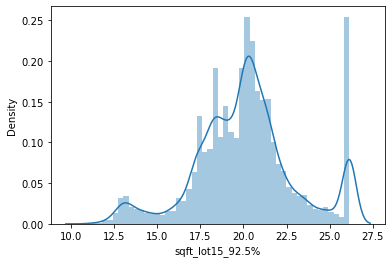

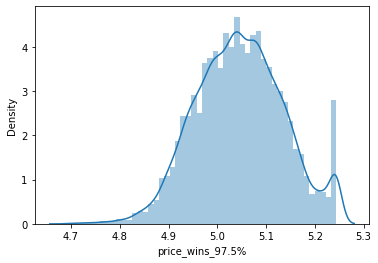

In [89]:
# check distribution of variables

for column in num_df_w_l.columns:
    sns.distplot(num_df_w_l[column])
    plt.show()

In [ ]:
# merge categorical and numerical variables to model dataframe
# review model dataframe
model_df_w_l = pd.merge(cat_df, num_df_w_l, left_index=True, right_index=True)
model_df_w_l

In [ ]:
## x\y split
Xwl = model_df_w_l.drop('price_wins_97.5%', axis=1)
ywl = model_df_w_l['price_wins_97.5%']
Xwl_train, Xwl_test, ywl_train, ywl_test = train_test_split(Xwl, ywl, test_size=0.3, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(Xwl_train, ywl_train)

In [ ]:
predictions  = model.predict(Xwl_test)
predictions.shape

In [ ]:
# evaluate model
r2_score(ywl_test, predictions), mean_squared_error(ywl_test, predictions, squared=False), mean_squared_error(ywl_test, predictions)

## Data Scaling techniques

- `Standard scaler`: Removes the mean and scales the data to unit variance. For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.
- `Min-max scaler`: It scales the data in the range of [0,1]. For each column, each value in the column is subtracted by the max of the column and then divided by the difference of max and min of the column. It is very sensitive to the presence of outliers.
- `Normalize`: It rescales the vector to have a unit norm. This means that, for each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance.



In [86]:
# Standardization/Standard Scaler

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized

scaled_value = (actual - min)/(max - min)

# Min-max scaler

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numerical)
x_min_max = transformer.transform(numerical)
x_min_max

# Normalization

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numerical)
x_normalized = transformer.transform(numerical)
x_normalized

SyntaxError: invalid syntax (<ipython-input-86-0d03dd1dba2d>, line 3)

## KNN

In [89]:
# KNN
for i in range(2,10):
for i in [10, 20, 30, 40, 50]

SyntaxError: invalid syntax (<ipython-input-89-c42182bbe7c4>, line 3)

In [157]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

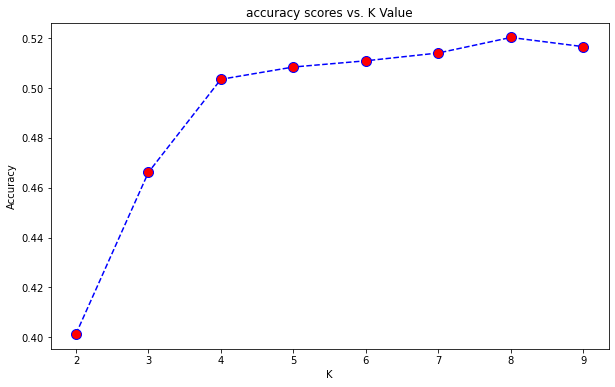

In [158]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

## Evaluate Quality of the Model

In [ ]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['target_d'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

In [ ]:
# Comparison of actual vs predicted value as a bar graph (100 values)

df1 = df.head(100)
df1.plot(kind = 'bar', figsize = (16,7))
plt.show()

In [493]:
# Analyzing results
# hint: to analyse your results, it might be a good idea to add your predictions to your dataframe
# visually evaluate model

sns.regplot(X['price'], y, line_kws={"color": "red"})

KeyError: 'price'

## Conclusion